In [1]:
%load_ext autoreload
%matplotlib inline
execfile ("_ImportScript.py")
import time

1


In [2]:
import matplotlib.pyplot as plt

In [3]:
beatbox.You.create_original_Universe()

In [4]:
numreal = 200

for i in range(numreal):
    beatbox.You.initiate_simulated_universe(truncated_nmax = 5)

Generated  514  potential Fourier coefficients
 with phases uniformly distributed between 0 and  6.28318530718
Generated  514  potential Fourier coefficients
 with phases uniformly distributed between 0 and  6.28318530718
Generated  514  potential Fourier coefficients
 with phases uniformly distributed between 0 and  6.28318530718
Generated  514  potential Fourier coefficients
 with phases uniformly distributed between 0 and  6.28318530718
Generated  514  potential Fourier coefficients
 with phases uniformly distributed between 0 and  6.28318530718
Generated  514  potential Fourier coefficients
 with phases uniformly distributed between 0 and  6.28318530718
Generated  514  potential Fourier coefficients
 with phases uniformly distributed between 0 and  6.28318530718
Generated  514  potential Fourier coefficients
 with phases uniformly distributed between 0 and  6.28318530718
Generated  514  potential Fourier coefficients
 with phases uniformly distributed between 0 and  6.28318530718
G

/Users/LaurencePeanuts/Documents/Travail/Stanford/Music/Music/beatbox/universe.py:597: RuntimeWarning: divide by zero encountered in power
  self.Power_Spectrum = self.PSnorm*10000*np.power((self.k/self.kstar) ,(-3+(self.n_s-1)))


In [5]:
if not os.path.isfile('../data/covCyy_lmax%d_lmin%d.txt' % (beatbox.Multiverse.truncated_lmax, beatbox.Multiverse.truncated_lmin)):
    beatbox.You.read_Planck_samples()
    beatbox.You.calculate_covariance_matrix(filename='lmax%d_lmin%d' % (beatbox.Multiverse.truncated_lmax, beatbox.Multiverse.truncated_lmin))
else:
    beatbox.You.load_covariance_matrix(filename='covCyy_lmax%d_lmin%d.txt' % (beatbox.Multiverse.truncated_lmax, beatbox.Multiverse.truncated_lmin))
    
# Calculate the inverse of the a_y covariance matrix
beatbox.You.calculate_sdv_Cyy_inverse()


datamap = beatbox.You.all_simulated_universes[0].ay2ayreal_for_inference(beatbox.You.all_simulated_universes[0].ay)+beatbox.You.generate_one_realization_of_noise()
beatbox.You.all_simulated_universes[-1].ay_real = datamap
 

MOCK = 1
beatbox.You.solve_for_3D_potential(datamap.T , A=None, print_alpha=0)

0.00153708457947
total time is:
0.0521860122681


/Users/LaurencePeanuts/Documents/Travail/Stanford/Music/Music/beatbox/universe.py:431: ComplexWarning: Casting complex values to real discards the imaginary part
  ay_real[zero_ind] = value[zero_ind].astype(np.float)
/Users/LaurencePeanuts/Documents/Travail/Stanford/Music/Music/beatbox/multiverse.py:493: ComplexWarning: Casting complex values to real discards the imaginary part
  R_real[zero_ind,:] = beatbox.Universe.R[zero_ind,:].astype(np.float)
/Users/LaurencePeanuts/Documents/Travail/Stanford/Music/Music/beatbox/multiverse.py:439: RuntimeWarning: divide by zero encountered in power
  Power_Spectrum = PSnorm*10000*np.power((beatbox.Universe.k/kstar) ,(-3+(n_s-1)))


In [6]:
cov_frac = np.zeros((numreal,1))

for i in range(numreal):
    print i
    noise_realization = beatbox.You.generate_one_realization_of_noise()
    true_alms = beatbox.You.all_simulated_universes[i].ay2ayreal_for_inference(beatbox.You.all_simulated_universes[i].ay)
    datamap =  true_alms + noise_realization
    beatbox.You.solve_for_3D_potential(datamap.T , A=1, print_alpha=0)
    
    We=beatbox.Universe()        
    beatbox.You.all_data_universes = np.append(beatbox.You.all_data_universes,We)
    beatbox.You.all_data_universes[i].fn = beatbox.You.reconstrunct_fn

    if i == 0:
            ordered_inds_largenmax = beatbox.You.all_simulated_universes[i].get_ordered_fn_indices()
            ordered_inds_smallnmax = beatbox.You.all_data_universes[i].get_ordered_fn_indices()
    min_n_mode = np.min((len(ordered_inds_largenmax), len(ordered_inds_smallnmax) )    )
    
    true_fns = beatbox.You.all_simulated_universes[i].fn[ordered_inds_largenmax[:min_n_mode]].reshape(-1,1)
    rec_fns = beatbox.You.all_data_universes[i].fn[ordered_inds_smallnmax[:min_n_mode]].reshape(-1,1)
    abs_diff = np.abs(true_fns - rec_fns)
    err_sig = np.sqrt(np.diag(beatbox.You.inv_A)[ordered_inds_smallnmax[:min_n_mode]])
    diff_sigma = np.divide(abs_diff.reshape(-1,1) , err_sig.reshape(-1,1) ).reshape(-1,1)
    cov_frac[i,0] = np.double(np.sum(diff_sigma<=1)) / np.double(len(diff_sigma))
#     np.savetxt( "/Users/yashar/GravIT/Cycle_4_analysis/data/noise_" + str("%0.03d" % i) + ".txt", noise_realization)
#     np.savetxt( "/Users/yashar/GravIT/Cycle_4_analysis/data/true_alm_" + str("%0.03d" % i) + ".txt", true_alms)
#     np.savetxt( "/Users/yashar/GravIT/Cycle_4_analysis/data/true_fn_" + str("%0.03d" % i) + ".txt", true_fns )
#     np.savetxt( "/Users/yashar/GravIT/Cycle_4_analysis/data/rec_fn_" + str("%0.03d" % i) + ".txt", rec_fns )
#     np.savetxt( "/Users/yashar/GravIT/Cycle_4_analysis/data/abs_diff_" + str("%0.03d" % i) + ".txt", abs_diff)
print diff_sigma

0
0.00130581855774
time for loading is:
0.00286197662354
successfully loaded A from the disk.
total time is:
0.00516104698181
1
0.00101685523987
time for loading is:
0.00192999839783
successfully loaded A from the disk.
total time is:
0.00358200073242
2
0.000581026077271
time for loading is:
0.00222611427307
successfully loaded A from the disk.
total time is:
0.00394701957703
3
0.00078296661377
time for loading is:
0.00136709213257
successfully loaded A from the disk.
total time is:
0.00337386131287
4
0.000392913818359
time for loading is:
0.000815868377686
successfully loaded A from the disk.
total time is:
0.00144195556641
5
0.000510931015015
time for loading is:
0.000946044921875
successfully loaded A from the disk.
total time is:
0.00174593925476
6
0.000320911407471
time for loading is:
0.000825881958008
successfully loaded A from the disk.
total time is:
0.00144004821777
7
0.00031590461731
time for loading is:
0.000744104385376
successfully loaded A from the disk.
total time is:
0

In [7]:
print cov_frac.shape
np.mean(cov_frac)
# print cov_frac


(200, 1)


0.68354085603112846

In [ ]:
np.unique(beatbox.You.all_data_universes[0].kfilter)

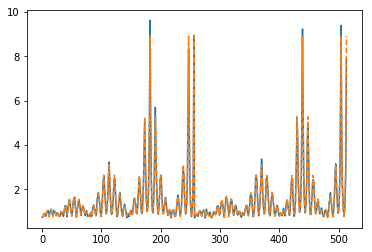

In [8]:
# Check calculated k covariance from samples, against prior covariance matrix
numCp = np.zeros(len(beatbox.You.all_simulated_universes[0].fn))
for j in range(len(beatbox.You.all_simulated_universes[0].fn)):
    fns = [beatbox.You.all_simulated_universes[i].fn[j] for i in range(numreal)]
    numCp[j] = np.std(fns) #1./(np.std(fns)**2)

plt.plot(numCp)
plt.plot(1/np.sqrt(np.diag(beatbox.You.inv_Cf)),'--')

[1, 34, -20, 20]

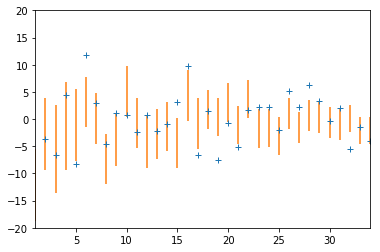

In [9]:
plt.plot(beatbox.You.all_simulated_universes[0].fn[ordered_inds_largenmax],' +')
err_sig = np.sqrt(np.diag(beatbox.You.inv_A)[ordered_inds_smallnmax])
eb2 = plt.errorbar(np.arange(0,len(beatbox.You.all_data_universes[0].fn)).reshape(-1,1) , beatbox.You.all_data_universes[0].fn[ordered_inds_smallnmax].reshape(-1,1) , yerr = err_sig.reshape(-1,1),ls=' ')
plt.axis([1 ,34, -20, 20])

In [ ]:
# test that the noise covariance matrix is correct
datamap = np.zeros((numreal,24))

for i in range(numreal):
    datamap[i,:] = beatbox.You.generate_one_realization_of_noise()



In [ ]:
datamap.shape

In [ ]:
plt.subplot(1,2,1)
plt.imshow(np.cov(datamap.T))
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(np.linalg.inv(beatbox.You.inv_Cyy))
plt.colorbar()